# Notebook to analyze output of Grid code for SU(4)
Author: Venkitesh Ayyar (vayyar@bu.edu) \
Dec 2, 2022

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import subprocess as sp
import os 
import glob
import pandas as pd

In [20]:
# %matplotlib widget

In [21]:
%matplotlib notebook

In [23]:
# fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov16/dm_tests/run1/SDM.4node'

fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov30/dm_tests/run_dwf/SDM.4node'


### Get Plaquette value

In [28]:
cmd="grep 'Plaq' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
print(op[0])

grep 'Plaq' /usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov30/dm_tests/run_dwf/SDM.4node
Grid : Message : 30.930530 s : Plaquette: [ 1 ] 0.6893394207148619


In [29]:
cols=['iter','val','time']
df=pd.DataFrame(columns=cols)

for count,i in enumerate(op): 
    itr=int(i.split('[ ')[-1].split(' ]')[0])
    val=np.float64(i.split(' ')[-1])
    time=np.float64(i.split(': ')[2].split(' s')[0])
    dict1={'iter':itr, 'val':val, 'time':time}
#     print(dict1)
    df=pd.concat([df,pd.DataFrame(dict1,index=[count])])
    count+=1

In [30]:
df

,iter,val,time
0,1,0.689339,30.930530
1,2,0.660460,56.651515
2,3,0.637075,83.172198
3,4,0.619621,109.566330
4,5,0.608936,135.979263
...,...,...,...
205,206,0.578191,5474.992280
206,207,0.577896,5501.507566
207,208,0.578200,5527.981456
208,209,0.579340,5554.512175


<IPython.core.display.Javascript object>


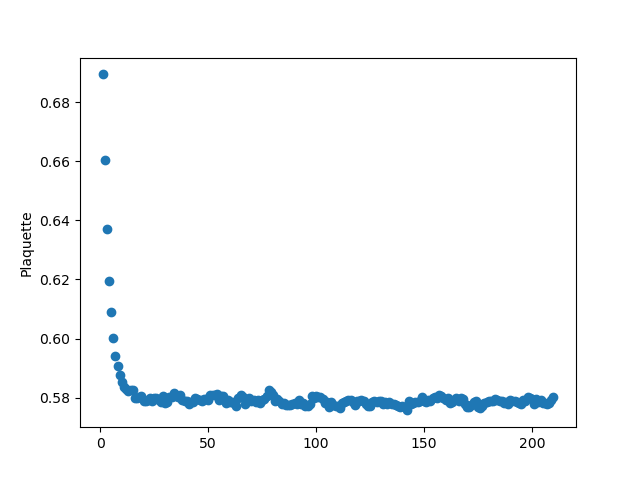

Text(0, 0.5, 'Plaquette')

In [31]:
plt.figure()
x=df.iter.values
y=df.val.values
plt.plot(x,y,marker='o',linestyle='')
plt.ylabel('Plaquette')
# plt.show()

### Get acceptance rate

In [32]:
cmd="grep 'Metropolis_test' %s"%(fname)
print(cmd)
op=sp.check_output(cmd,shell=True).decode().split('\n') # decode bytes to string and split by newlines
op=[i for i in op if i] # Drop null string
print(op[0])

grep 'Metropolis_test' /usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2022_nov30/dm_tests/run_dwf/SDM.4node
Grid : Message : 294.456836 s : Metropolis_test -- ACCEPTED


In [33]:
cols=['iter','val','time']
df=pd.DataFrame(columns=cols)

for count,i in enumerate(op): 
    val=1 if (i.split(' ')[-1]=='ACCEPTED') else 0 # Accept =1 , Reject = 0
    time=np.float64(i.split(': ')[2].split(' s')[0]) 
    dict1={'iter':count, 'val':val, 'time':time}
#     print(dict1)
    df=pd.concat([df,pd.DataFrame(dict1,index=[count])])
    count+=1

In [34]:
df

,iter,val,time
0,0,1,294.456836
1,1,1,320.825777
2,2,1,347.245836
3,3,1,373.688493
4,4,1,400.566550
...,...,...,...
195,195,1,5474.979111
196,196,1,5501.494414
197,197,1,5527.968292
198,198,1,5554.499017


<IPython.core.display.Javascript object>


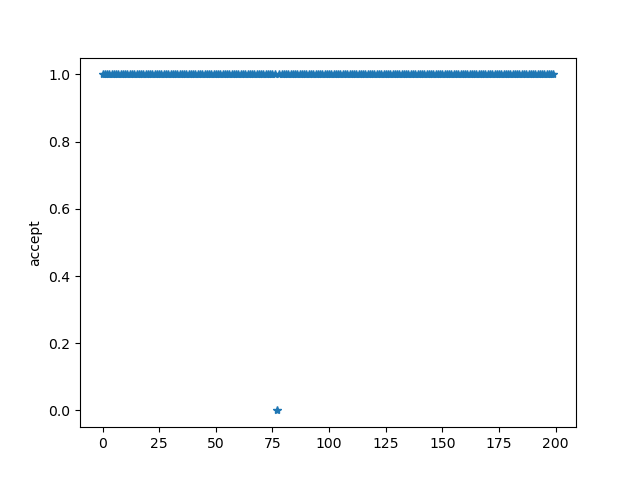

In [35]:
plt.figure()
x=df.iter.values
y=df.val.values
plt.ylabel('accept')
plt.plot(y,marker='*',linestyle='')
plt.show()

In [36]:
# Print Acceptance ratio
ct=df['val'].value_counts()
print(ct)

Act=ct[1]
Rft=ct[0]
print(Act* 100 /(Act+Rft),'%')

1    199
0      1
Name: val, dtype: int64
99.5 %
